On se propose de résoudre l'EDO de l'oscillateur harmonique pour une particule de masse $m$ à une dimension,

$$
\ddot{x}(t) = - \omega^2 x(t), \quad \omega = \sqrt{\frac{k}{m}}
$$

Il s'agit d'une EDO du second ordre. Il s'agit maintenant de la réécrire sous la forme d'un système d'EDO du premier ordre.    
Une première idée est de poser: $x_1 = x$ et $x_2 = \dot{x}$. 

Une autre idée est d'utiliser le formalisme de la mécanique hamiltonienne. En effet, celui-ci grâce aux équations canoniques permet de passer de $N$ EDOs du 2ème ordre à $2N$ EDO du 1er ordre.

Soit l'Hamiltonien de l'oscillateur harmonique,

$$
  \mathcal{H}(q,p) = \frac{p^2}{2m} + \frac{1}{2}kq^2
$$

Ecrivons les équations canoniques,

$$
\dot{q} = \frac{\partial \mathcal{H}}{\partial p} = \frac{p}{m}
$$

$$
\quad \dot{p} = - \frac{\partial \mathcal{H}}{\partial q} = -kq
$$

On peut réécrire sous forme matriciel,
$$
\begin{pmatrix}
  \dot{q} \\ \dot{p}
\end{pmatrix}
=
\begin{pmatrix}
  0 & 1/m \\ -k & 0
\end{pmatrix}
\begin{pmatrix}
  q \\ p
\end{pmatrix}
, \quad \vec{x} = (q, p)
$$

On écrit le système discrètisé pour Euler avant,
$$
\dot{x} \approx \frac{x_{i+1} - x_{i}}{\Delta t} \implies x_{i+1} = x_{i} + \Delta t \dot{x}
$$

$$
\begin{align}
  x_{i+1} 
    &= x_{i} + \Delta t \cdot Mx_{i} \\
    &= x_{i}(1 + \Delta t \cdot M)
\end{align}
$$

In [1]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt 

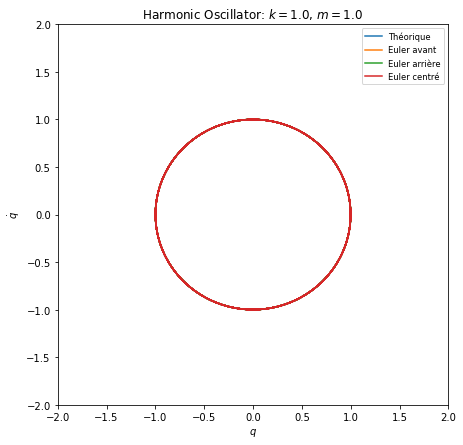

In [12]:
k = 1. # constante de rappel
m = 1. # mass 
w = np.sqrt(k/m) # pulsation

# matrix M for our EDO system: \dot{x} = Mx
M = np.array([[0, 1/m], [-k, 0]])

# initial conditions: x(0) = (q(0), p(0))
q0 = 1.
p0 = 0.

# time
t0 = 0
tf = 50
deltaT = 0.1

nt = int((tf - t0) / deltaT)

# time mesh
time_mesh = np.linspace(start=t0, stop=tf, num=nt)

# set initial conditions
# create a big matrix that will contain
# our position and speed solutions
# for each step time
x = np.zeros((2, nt))
x[:,0] = [q0, p0]

# we can find it easily
# through the resolution of canonical equations
# and putting initial conditions: q(t=0) = q0 ; p(t=0) = p0
def analytical_solution(x, q0, p0, t):
    # q(t)
    x[0,:] = q0 * np.cos(w * t) + (p0 / m * w) * np.sin(w * t)
    # p(t)
    x[1,:] = - m * w * q0 * np.sin(w * t) + m * w * (p0 / m * w) * np.cos(w * t)
    return x

# here, the hamiltonian doesn't explicitly depends on time
# and it coincide with the energy
def energy(q, p, k, m):
    return (p ** 2) / (2 * m) + (1 / 2) * k * (q ** q)

def forward_euler(x, nt, deltaT, M):
    for t in range(0,nt): 
        # x_{n+1} = x_n(1 + \Delta T  M)
        # x is a vector \in \R^2
        # 1 is the identity matrix
        x[:,t+1] = np.matmul(x[:,t], (np.identity(2) + deltaT * M))
        return x

def backward_euler(x, nt, deltaT, M):
    for t in range(0,nt):
        invert_matrix = np.linalg.inv(np.identity(2) - deltaT * M)

        x[:,t+1] = np.matmul(x[:,t], invert_matrix)
        return x

def centered_euler(x, nt, deltaT, M):
    for t in range(0, nt):
        normal_matrix = np.identity(2) + (deltaT/2) * M 
        invert_matrix = np.linalg.inv(np.identity(2) - (deltaT/2) * M)
        #matrix = np.matmul(normal_matrix, invert_matrix)

        x[:,t+1] = np.linalg.multi_dot([x[:,t], normal_matrix, invert_matrix])
        return x

forward_euler_sol = forward_euler(x, nt, deltaT, M)
backward_euler_sol = backward_euler(x, nt, deltaT, M)
centered_euler_sol = centered_euler(x, nt, deltaT, M)
analytical_solution = analytical_solution(x, q0, p0, time_mesh)
  
def plot(k, m):
    fig, ax = plt.subplots(figsize=(7,7))
    ax.plot(analytical_solution[0,:], analytical_solution[1,:]/m, label="Théorique")
    ax.plot(forward_euler_sol[0,:], forward_euler_sol[1,:]/m, label="Euler avant")
    ax.plot(backward_euler_sol[0,:], backward_euler_sol[1,:]/m, label="Euler arrière")
    ax.plot(centered_euler_sol[0,:], centered_euler_sol[1,:], label="Euler centré")
    ax.legend(fontsize="small")
    ax.set_xlabel("$q$")
    ax.set_ylabel("$\dot{q}$")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(f"Harmonic Oscillator: $k={k}$, $m={m}$")
    plt.show()

plot(k, m)